In [13]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt

In [4]:
fix = []
fix += [pickle.load(open("l[stress:.1,l1:.9]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.2,l1:.8]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.3,l1:.7]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.4,l1:.6]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.5,l1:.5]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.6,l1:.4]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.7,l1:.3]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.8,l1:.2]_fix-imp_test.pickle", "rb"))]
fix += [pickle.load(open("l[stress:.9,l1:.1]_fix-imp_test.pickle", "rb"))]

sa = []
sa += [pickle.load(open("l[stress:.2,l1:.8]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.3,l1:.7]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.4,l1:.6]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.5,l1:.5]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.6,l1:.4]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.7,l1:.3]_sa[beta:1,p:0]_test.pickle", "rb"))]
sa += [pickle.load(open("l[stress:.8,l1:.2]_sa[beta:1,p:0]_test.pickle", "rb"))]

In [78]:
sa[0].keys()

dict_keys(['stress', 'raw_stress_ratio', 'scaled_stress_ratio', 'resolution_score', 'min_angle', 'losses'])

Text(0, 0.5, 'stress ratio')

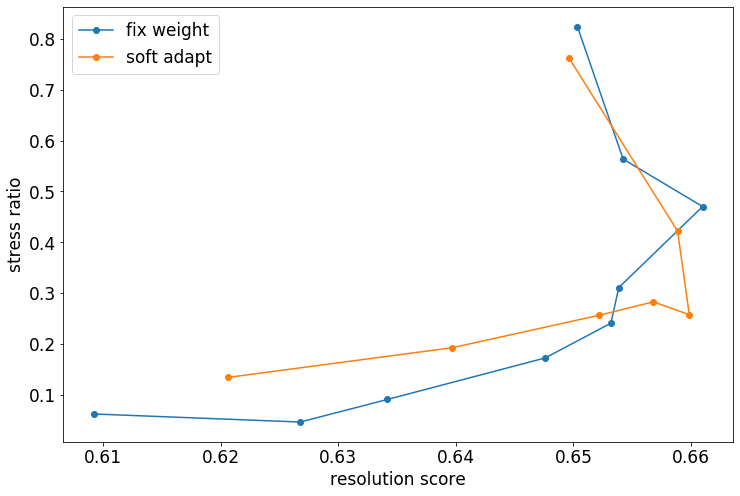

In [98]:
fixs = [fix[i]['scaled_stress_ratio'].mean().item() for i in range(9)]
fixa = [fix[i]['resolution_score'].mean().item() for i in range(9)]

sas = [sa[i]['scaled_stress_ratio'].mean().item() for i in range(7)]
saa = [sa[i]['resolution_score'].mean().item() for i in range(7)]
plt.figure(figsize=[12, 8])
plt.plot(fixa, fixs, 'o-')
plt.plot(saa, sas, 'o-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['fix weight', 'soft adapt'],fontsize=17)
plt.xlabel('resolution score',fontsize=17)
plt.ylabel('stress ratio',fontsize=17)

Text(0, 0.5, 'stress loss')

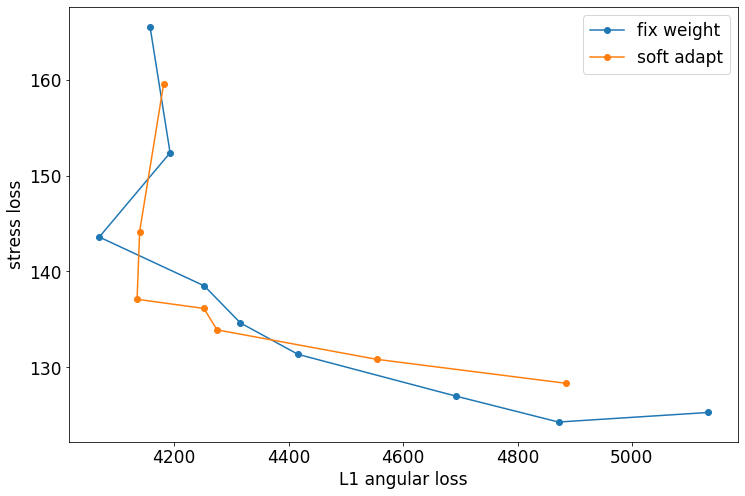

In [92]:
fixs = [fix[i]['stress'].mean().item() for i in range(9)]
fixa = [fix[i]['losses'][:,1].mean().item() for i in range(9)]

sas = [sa[i]['stress'].mean().item() for i in range(7)]
saa = [sa[i]['losses'][:,1].mean().item() for i in range(7)]
plt.figure(figsize=[12, 8])
plt.plot(fixa, fixs, 'o-')
plt.plot(saa, sas, 'o-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['fix weight', 'soft adapt'],fontsize=17)
plt.xlabel('L1 angular loss',fontsize=17)
plt.ylabel('stress loss',fontsize=17)

In [96]:
def frontier(idx):
    fixs = [fix[i]['stress'][idx].item() for i in range(9)]
    fixa = [fix[i]['losses'][:,1][idx].item() for i in range(9)]

    sas = [sa[i]['stress'][idx].item() for i in range(7)]
    saa = [sa[i]['losses'][:,1][idx].item() for i in range(7)]
    plt.figure(figsize=[12, 8])
    plt.plot(fixa, fixs, 'o-')
    plt.plot(saa, sas, 'o-')
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.xlabel('L1 angular loss', fontsize=17)
    plt.ylabel('stress loss', fontsize=17)
    plt.legend(['fix weight', 'soft adapt'], fontsize=17)

[None, None, None, None, None, None, None, None, None, None]

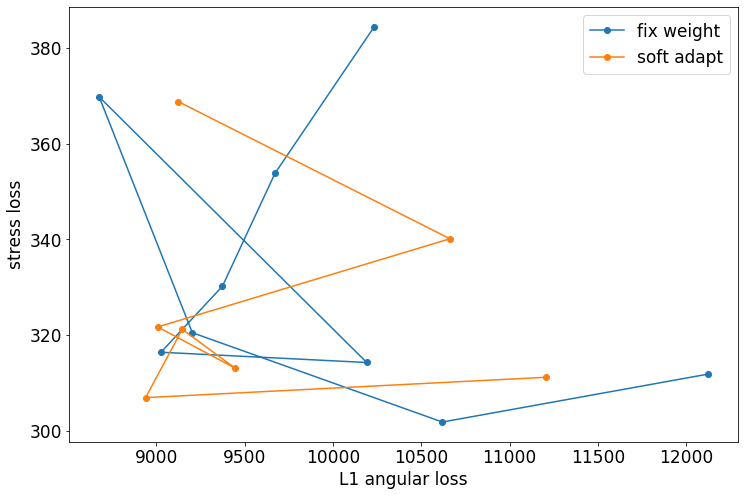

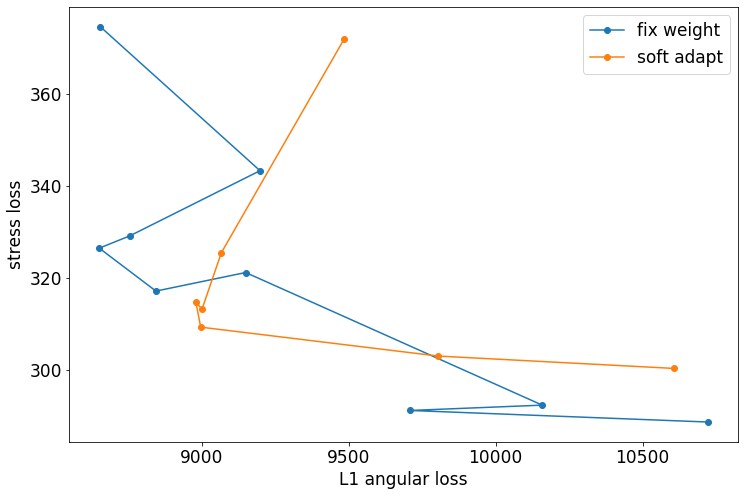

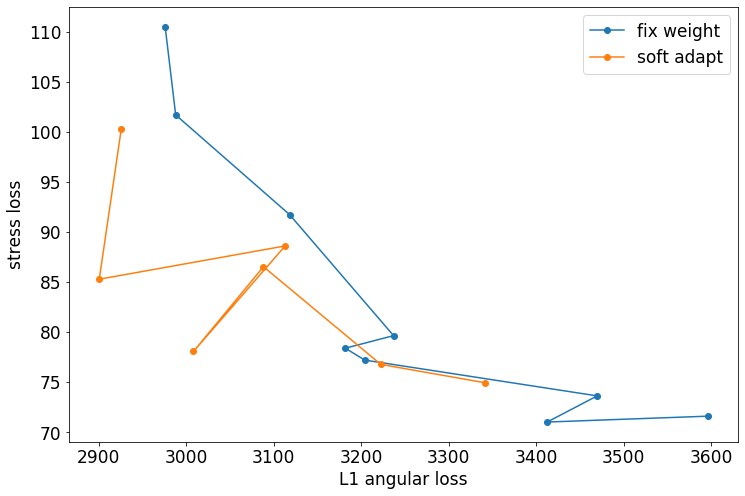

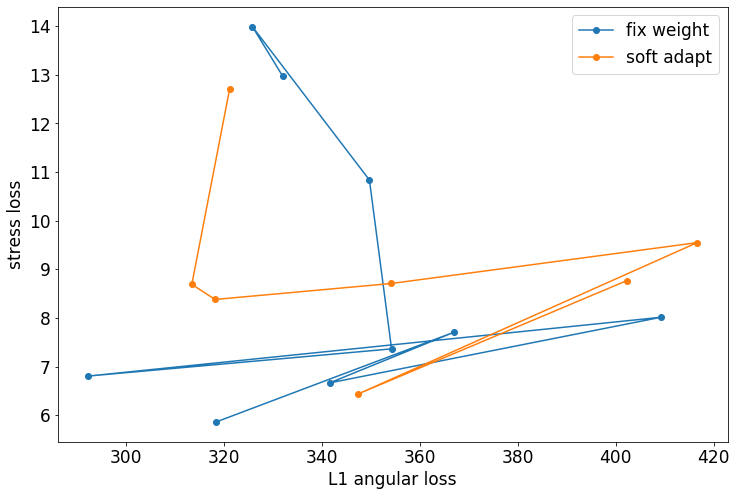

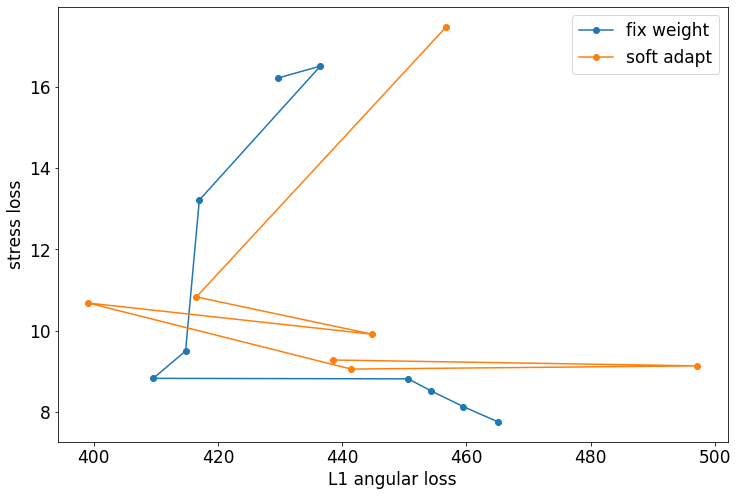

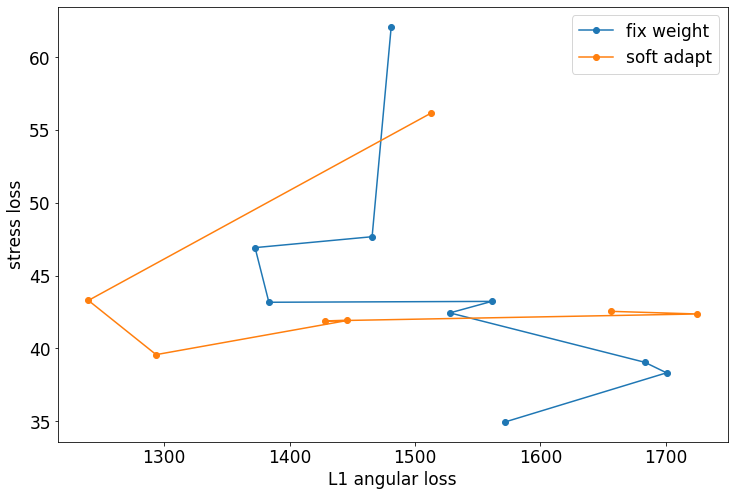

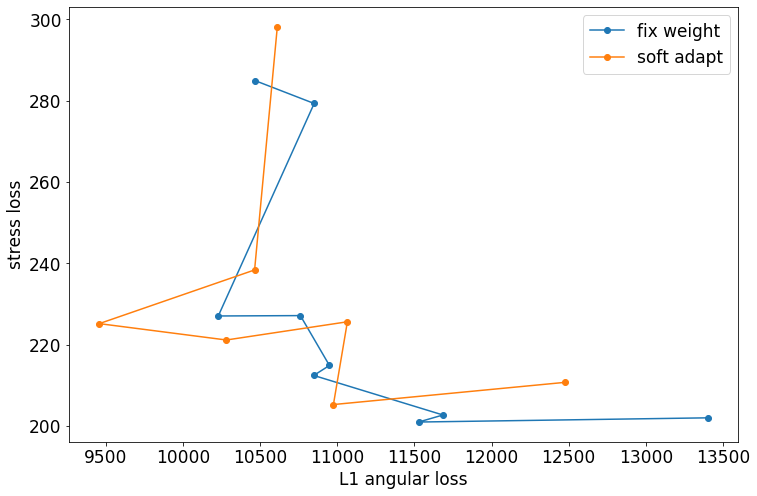

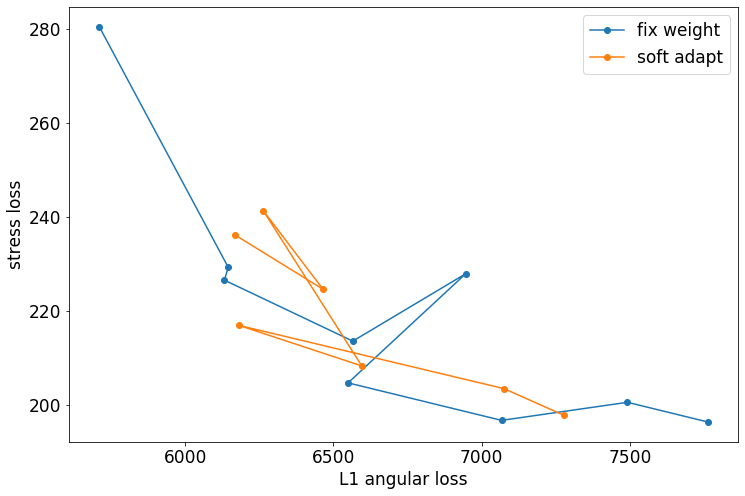

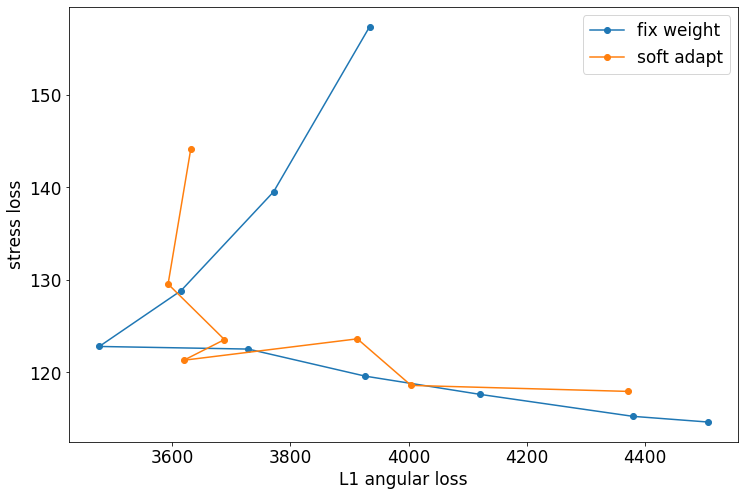

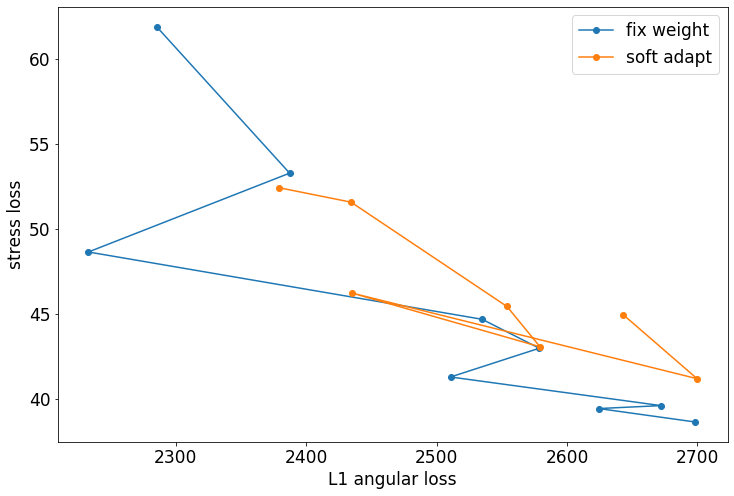

In [97]:
[frontier(i) for i in range(0, 1000, 100)]